##                                                Recommendation System 

In [5]:
!pip install matplotlib
!pip install seaborn



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting for notebooks
%matplotlib inline

# Use a specific style for plots
plt.style.use('fivethirtyeight')


### Let's go through ratings dataset

In [3]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


### Let's go through movies dataset

In [4]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Merging two dataframes

In [5]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


### Average rating of each movie

In [6]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [7]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

### Plot the total number of ratings for a movie

In [8]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

### Average rating of each movie

In [9]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

### Number of ratings for a movie

In [10]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [11]:
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


###  Plot a histogram for the number of ratings 

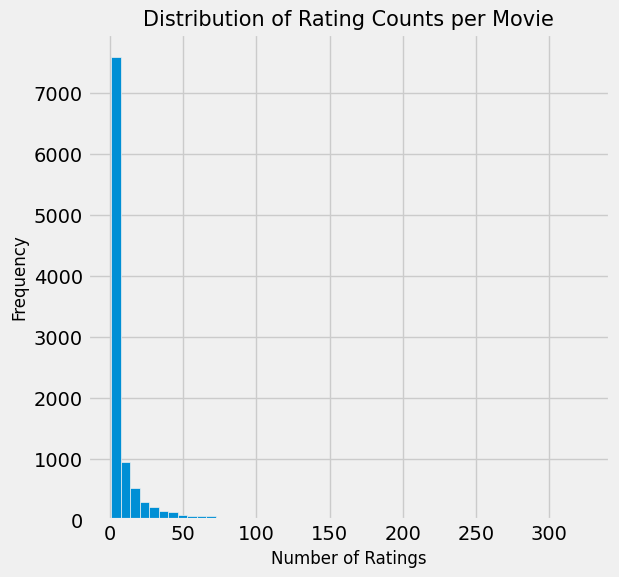

In [29]:
plt.figure(figsize=(6, 6))

# Force edge color for patches (optional for visualization style)
plt.rcParams['patch.force_edgecolor'] = True

# Plot a histogram of the 'rating_counts' column
ratings_mean_count['rating_counts'].hist(bins=50)

# Add title and labels for better visualization
plt.title('Distribution of Rating Counts per Movie', fontsize=15)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

###  Plot a histogram for average ratings

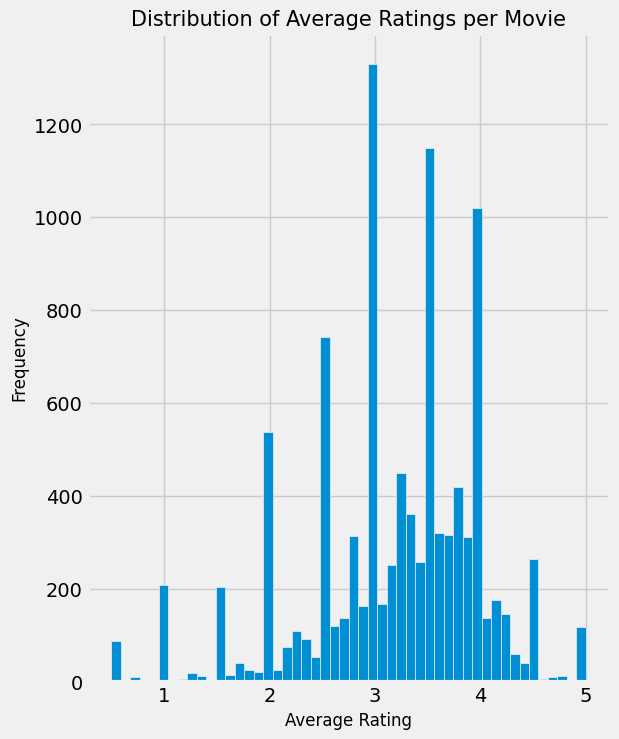

In [28]:
plt.figure(figsize=(6, 8))
plt.rcParams['patch.force_edgecolor'] = True

# Use 'mean_rating' instead of 'rating' if that's the correct column
ratings_mean_count['rating'].hist(bins=50)

# Add title and labels
plt.title('Distribution of Average Ratings per Movie', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

### Plot average ratings against the number of ratings

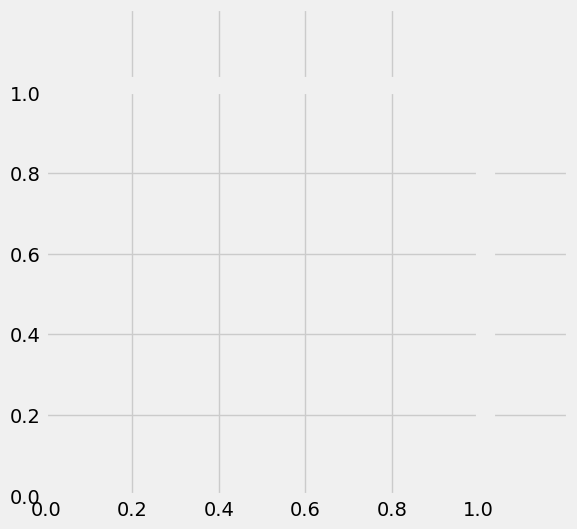

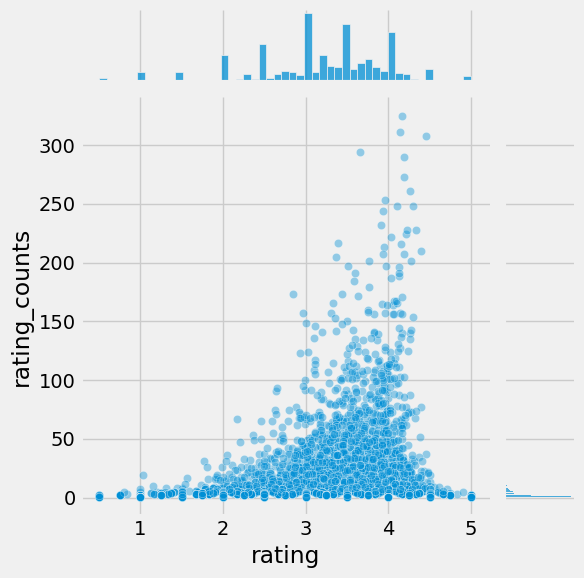

In [31]:
# Ensure the patch edge color is set for all patches (optional)
plt.rcParams['patch.force_edgecolor'] = True

# Create a jointplot to show the relationship between 'rating' and 'rating_counts'
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

# Display the plot
plt.show()

## Finding Similarities Between Movies

In [15]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### User ratings for Forrest Gump (1994) 

In [16]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head()

userId
1    3.0
2    NaN
3    3.0
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

### Correlation between the user ratings for the Forest Gump (1994) and all the other movies 

In [17]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

C:\Users\Jai\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Jai\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Jai\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\Jai\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Jai\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [18]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375


###  Movies in descending order of correlation to see highly correlated movies at the top

In [19]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Martian Child (2007),1.0
Save the Tiger (1973),1.0
Underworld (1996),1.0
Shortbus (2006),1.0
"Court Jester, The (1956)",1.0
Bottle Shock (2008),1.0
Anna Karenina (2012),1.0
Elegy (2008),1.0
Half Light (2006),1.0


In [20]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3


### Filter movies correlated to Forest Gump (1994), that have more than 50 ratings

In [21]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52


### Now, we can see from the above output the movies that are highly correlated with Forrest Gump (1994).The movies in the list are some of the most famous movies Hollywood movies, and since Forest Gump (1994) is also a very famous movie, there is a high chance that these movies are highly correlated.